In [23]:
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import mpl_finance as mpf
from mplfinance.original_flavor import candlestick_ohlc
%matplotlib inline
import seaborn as sns

#time
import datetime as datetime

#talib
import talib

In [24]:
start = datetime.datetime(2018,4,1)
end = datetime.datetime(2019,4,1)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start , end = end)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/hannahchen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hannahchen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hannahchen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32218 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hannahchen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/hannahchen/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/

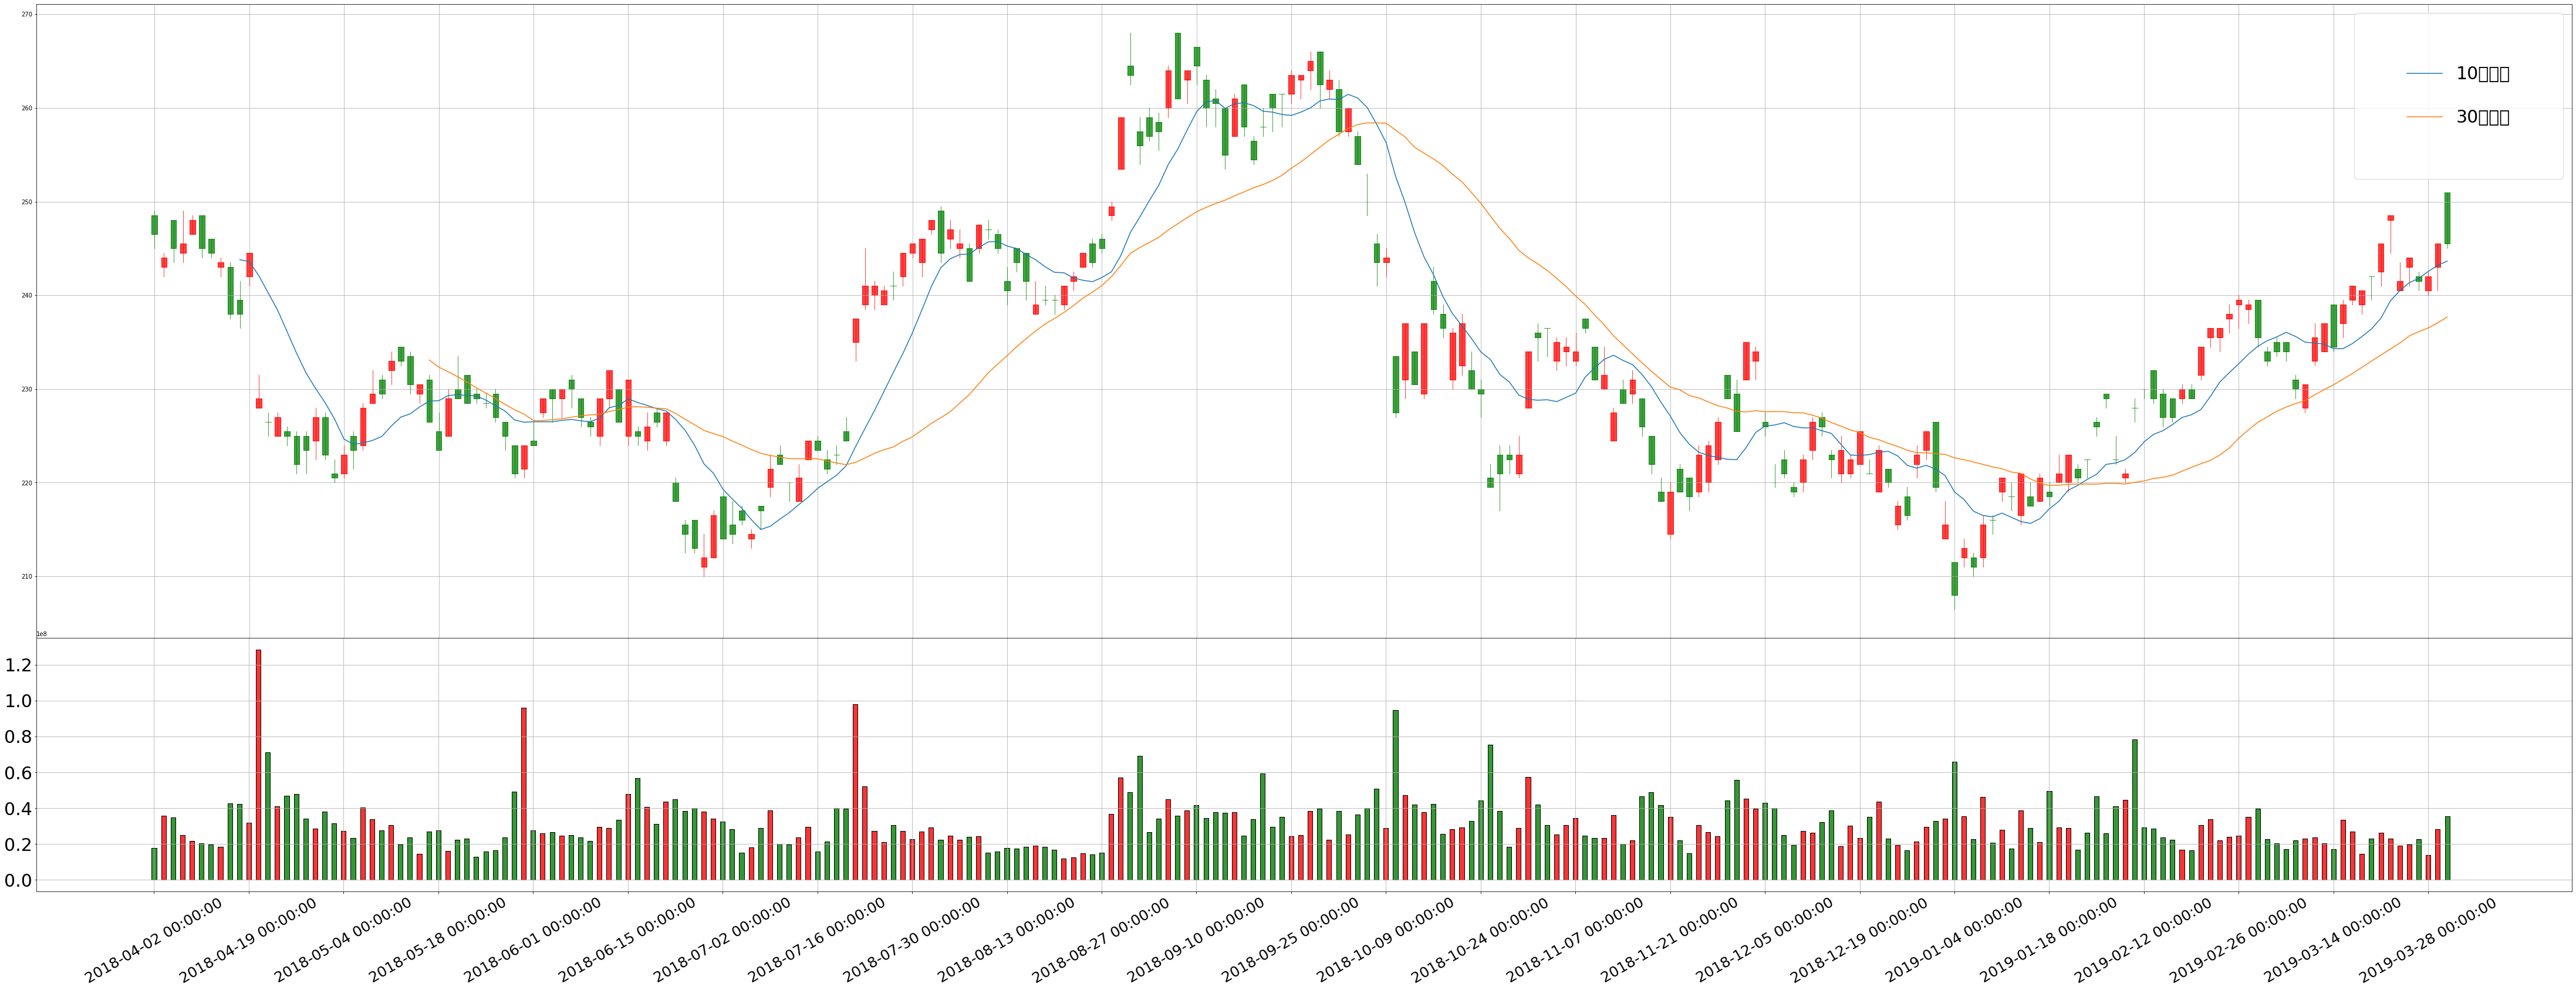

In [25]:
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)

fig = plt.figure(figsize=(60 , 30))
ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])

ax.set_xticks(range(0, len(df_2330.index), 10))  #設定x軸標籤
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                       df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)

plt.rcParams['font.sans-serif'] = ['simhei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

mpf.volume_overlay(ax2, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2330.index), 10))
ax2.set_xticklabels(df_2330.index[::10])

ax.grid(True)
ax.legend(borderpad = 3 , labelspacing = 1.5 , fontsize = 30)
fig = plt.xticks(fontsize=25 , rotation=30)
fig = plt.yticks(fontsize=30)
fig = plt.grid(True)

plt.show()